# Active learning with MaskAL

#### Blogpost:
If you'd like to learn more about active learning and how the MaskAL software works, you can read my blogpost here:
https://medium.com/@daandw5/active-learning-what-is-it-and-how-does-it-work-c002f52ff3f2?source=friends_link&sk=80a47662dfd07c06852b5c80734494e4

---


#### User manuals and scripts:
All data used to get these results, the python script to select labels and user manuals can be found on my GitHub page: 

https://github.com/DeWildeDaan/ResearchProject-MCTS5


Make sure you follow the steps in the installation and user manual if you want to recreate this demo on your own.


---


####MaskAL and Detectron2:
In this demo you'll see the effects of using active learning with MaskAL on Detectron2. I chose MaskAL to integrate active learning with Detectron2 because it's the best documented and easy to set up in my opinion.

MaskAL is created and provided by Pieter Blok. All code and documentation can be found on the MaskAL GitHub repo:

https://github.com/pieterblok/maskal.git

Detectron2 is a pre-trained model cabable of object detection, segmentation, keypoint detection and more. Detectron2 is created and provided by the Facebook research team, the GitHub repo can be found here:

https://github.com/facebookresearch/detectron2


Make sure before you start, you connect to a runtime with GPU.
This can be done by going to:

Edit -> Notebooksettings -> select GPU in Hardware accelerator tab.

In [ ]:
#First we clone the MaskAL repo and install all needed dependencies.
!git clone https://github.com/pieterblok/maskal.git
!cd maskal && pip install -e .
!pip install cerberus
!pip install baal
!pip install xmltodict
!pip install matplotlib==3.1.3

Cloning into 'maskal'...
remote: Enumerating objects: 1892, done.
remote: Counting objects: 100% (417/417), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 1892 (delta 301), reused 416 (delta 300), pack-reused 1475
Receiving objects: 100% (1892/1892), 21.86 MiB | 13.70 MiB/s, done.
Resolving deltas: 100% (961/961), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/maskal
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141231 sha256=0f1d395171f95023622f1e891664617ca7e612d746

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 94.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
baal 1.7.0 requires matplotlib<4.0.0,>=3.4.3, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
#Here we get all needed files I provided in my GitHub repo and put them in the correct folders.
!wget https://github.com/DeWildeDaan/ResearchProject-MCTS5/raw/main/AL-demo-files.zip
!unzip AL-demo-files.zip > /dev/null
!rm AL-demo-files.zip
!mv AL-demo-files maskal/AL-demo-files
!mv maskal/AL-demo-files/config/config_AL.yml maskal/config_AL.yml
!mv maskal/AL-demo-files/config/config_random.yml maskal/config_random.yml
!rmdir maskal/AL-demo-files/config

--2023-01-24 14:53:30--  https://github.com/DeWildeDaan/ResearchProject-MCTS5/raw/main/AL-demo-files.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DeWildeDaan/ResearchProject-MCTS5/main/AL-demo-files.zip [following]
--2023-01-24 14:53:30--  https://raw.githubusercontent.com/DeWildeDaan/ResearchProject-MCTS5/main/AL-demo-files.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73869413 (70M) [application/zip]
Saving to: ‘AL-demo-files.zip’

AL-demo-files.zip   100%[===================>]  70.45M   349MB/s    in 0.2s    

2023-01-24 14:53:36 (349 MB/s) - ‘AL-demo-files.zip’ saved [738694

In [ ]:
#Some basic imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

 # 1: Training a model with active learning
 This is where we start running the MaskAL script with the provided 'config_AL.yml' file.
 MaskAL will ask to label the needed images in the output prompt.
 You can copy those image names and paste them in the provided python script in my GitHub repo.
 Once you have the labels for the images you'll have to go to 'maskal/AL-demo-files/train/annotate' and upload the labels here.
 MaskAL will detect those labels and start training the model. 
 It will start by asking 10 labels at the start and then move on to ask 10 x 5 labels at a time.

In [ ]:
!cd maskal && python maskAL.py --config config_AL.yml

Streaminguitvoer ingekort tot de laatste 5000 regels.
      (bbox_pred): Linear(in_features=1024, out_features=4, bias=True)
    )
    (mask_pooler): ROIPooler(
      (level_poolers): ModuleList(
        (0): ROIAlign(output_size=(14, 14), spatial_scale=0.25, sampling_ratio=0, aligned=True)
        (1): ROIAlign(output_size=(14, 14), spatial_scale=0.125, sampling_ratio=0, aligned=True)
        (2): ROIAlign(output_size=(14, 14), spatial_scale=0.0625, sampling_ratio=0, aligned=True)
        (3): ROIAlign(output_size=(14, 14), spatial_scale=0.03125, sampling_ratio=0, aligned=True)
      )
    )
    (mask_head): MaskRCNNConvUpsampleHeadDropout(
      (mask_fcn1): Conv2d(
        256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
        (activation): ReLU()
      )
      (mask_fcn2): Conv2d(
        256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
        (activation): ReLU()
      )
      (mask_fcn3): Conv2d(
        256, 256, kernel_size=(3, 3), stride=(1, 1), paddin

Text(0.5, 1.0, 'mAP by amount of training images (AL)')

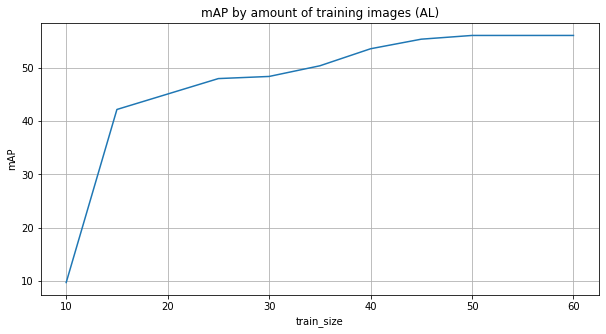

In [ ]:
#Here we get the results from our first run and plot them.
df_AL = pd.read_csv('./maskal/results/ActiveLearning/uncertainty/uncertainty.csv')

a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)

al_plot = sns.lineplot(x='train_size', y='mAP', markers=True, dashes=True, data=df_AL)
plt.grid()
plt.title("mAP by amount of training images (AL)")

# 2: Training a model with random image sampling
This is where we start running the MaskAL script with the provided 'config_random.yml' file.
MaskAL will ask to label the needed images in the output prompt.
You can copy those image names and paste them in the provided python script in my GitHub repo.
Once you have the labels for the images you'll have to go to 'maskal/AL-demo-files/trainrandom/annotate' and upload the labels here.
MaskAL will detect those labels and start training the model. 
It will start by asking 10 labels at the start and then move on to ask 10 x 5 labels at a time.

In [ ]:
!cd maskal && python maskAL.py --config config_random.yml

Streaminguitvoer ingekort tot de laatste 5000 regels.
      (cls_score): Linear(in_features=1024, out_features=2, bias=True)
      (dropout2): Dropout(p=0.25, inplace=False)
      (bbox_pred): Linear(in_features=1024, out_features=4, bias=True)
    )
    (mask_pooler): ROIPooler(
      (level_poolers): ModuleList(
        (0): ROIAlign(output_size=(14, 14), spatial_scale=0.25, sampling_ratio=0, aligned=True)
        (1): ROIAlign(output_size=(14, 14), spatial_scale=0.125, sampling_ratio=0, aligned=True)
        (2): ROIAlign(output_size=(14, 14), spatial_scale=0.0625, sampling_ratio=0, aligned=True)
        (3): ROIAlign(output_size=(14, 14), spatial_scale=0.03125, sampling_ratio=0, aligned=True)
      )
    )
    (mask_head): MaskRCNNConvUpsampleHeadDropout(
      (mask_fcn1): Conv2d(
        256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
        (activation): ReLU()
      )
      (mask_fcn2): Conv2d(
        256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
   

Text(0.5, 1.0, 'mAP by amount of training images (Random)')

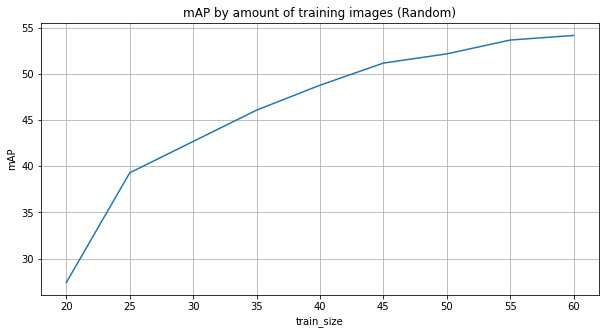

In [ ]:
#Here we get the results from our second run and plot them.
df_random = pd.read_csv('./maskal/results/Random/random/random.csv')

a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)

random_plot = sns.lineplot(x='train_size', y='mAP', markers=True, dashes=True, data=df_random)
plt.grid()
plt.title("mAP by amount of training images (Random)")

# The final results

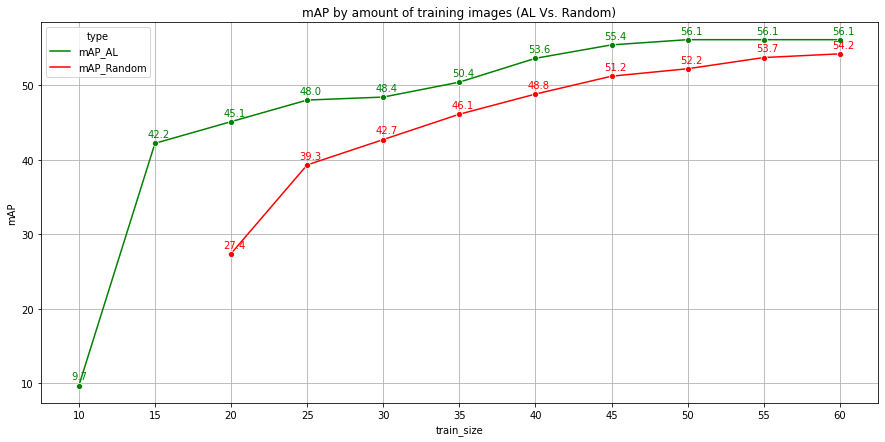

In [ ]:
#Here we will compare the results from our first run to the results of the second run and plot them.

df = pd.DataFrame()
df["train_size"] = df_AL["train_size"]
df["mAP_AL"] = df_AL["mAP"]
df["mAP_Random"] = df_random["mAP"]

dfm = df.melt('train_size', var_name='type', value_name='mAP')

a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)

palette = ['g','r']
al_vs_random_plot = sns.lineplot(x='train_size', y='mAP', hue='type', markers=False, dashes=True, data=dfm, palette=palette, marker="o")
plt.xticks(df["train_size"])
plt.grid()
plt.title("mAP by amount of training images (AL Vs. Random)")
for item, color in zip(dfm.groupby('type'),palette):
    for x,y,m in item[1][['train_size','mAP','type']].values:
        ax.text(x-0.5,y+0.8,f"{y}",color=color)

#How to interpret this graph?
The green line are the results from our first run with Active Learning;
this is where the input pictures where selected by MaskAL.

The red line are the results of our second run with random sampling;
this is where the input images are completely randomly selected.

x-axis: the amount of training images the model was trained on

y-axis: the mean average precision of the model

In this example, our model trained with active learning already had a better result with only 75% of our training data and had maximum results with 83,3% of our total training data.


---


#What is mAP (mean average precision)?
mAP formula is based on the following sub metrics:

- Confusion Matrix
- Intersection over Union(IoU)
- Recall
- Precision

In [ ]:
#OPTIONAL:
#If you'd like to save the results you can run this cel.

#First it will make a folder named 'FinalResults' with following subfolders:
#-Plots: where you can find all 3 plots.
#-Models: where you can find the final models trained with Active Learning or random sampling.
#-Results: where you can find CSV files with all mAP results of our models to load into a dataframe later.

#A .zip file will be generated, ready to be downloaded.
!mkdir FinalResults
!mkdir FinalResults/Plots
!mkdir FinalResults/Models
!mkdir FinalResults/Results

fig = al_vs_random_plot.get_figure()
fig.savefig("./FinalResults/Plots/Plot_AL_Vs_Random.jpg")

fig = al_plot.get_figure()
fig.savefig("./FinalResults/Plots/Plot_AL_Results.jpg")

fig = random_plot.get_figure()
fig.savefig("./FinalResults/Plots/Plot_Random_Results.jpg")

!cp maskal/results/Random/random/random.csv FinalResults/Results/Results_Random.csv
!cp maskal/results/ActiveLearning/uncertainty/uncertainty.csv FinalResults/Results/Results_AL.csv

!cp maskal/weights/Random/random/model_final.pth FinalResults/Models/Final_Model_Random.pth
!cp maskal/weights/ActiveLearning/uncertainty/model_final.pth FinalResults/Models/Final_Model_AL.pth

!zip -r FinalResults.zip FinalResults